In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import math
import numpy as np
 

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


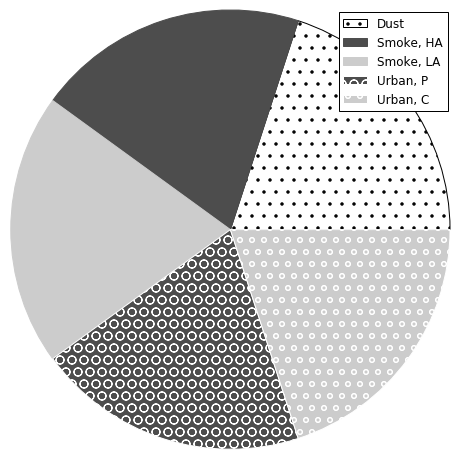

In [2]:
plt.figure(figsize=(8,8))

# The slices will be ordered and plotted counter-clockwise.
labels = ['Dust', 'Smoke, HA', 'Smoke, LA', 'Urban, P', 'Urban, C',]
sizes = [20, 20, 20, 20, 20]
colors = ['w', '0.3', '0.8', '0.3', '0.8']
edgcolors = ['r', 'r', 'r', 'r', 'r']
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
patch = plt.pie(sizes, explode=explode, colors=colors, startangle=0)[0]
# Set aspect ratio to be equal so that pie is drawn as a circle.

#hatching
patch[0].set_hatch('.')
patch[1].set_hatch('')
patch[1].set_edgecolor('0.3')
patch[2].set_hatch('')
patch[2].set_edgecolor('0.8')
patch[3].set_hatch('O')
patch[3].set_edgecolor('w')
patch[4].set_hatch('o')
patch[4].set_edgecolor('w')
plt.axis('equal')

plt.legend(patch, labels)
plt.show()


Mapa

In [5]:
def draw_pie(ax,ratios=[0.4,0.3,0.3], X=0, Y=0, size = 1000):
    N = len(ratios)
 
    colors = ['white', '#363636', '#bbbbb9', '#363636', '#bbbbb9']
    edgcolors = ['k', '', '', 'w', 'w']
    #colors = ['red','blue','green','yellow','magenta']
    pattern = ['.','','','O','o']
    xy = []
 
    data = []
    start = 0.
    for ratio in ratios:
        x = [0] + np.cos(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        y = [0] + np.sin(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        xy1 = zip(x,y)
        xy.append(xy1)
        start += ratio
 
    for i, xyi in enumerate(xy):
        ax.scatter([X],[Y] , marker=(xyi,0), s=size, facecolor=colors[i], hatch=pattern[i],edgecolor=edgcolors[i] )
 
    return data

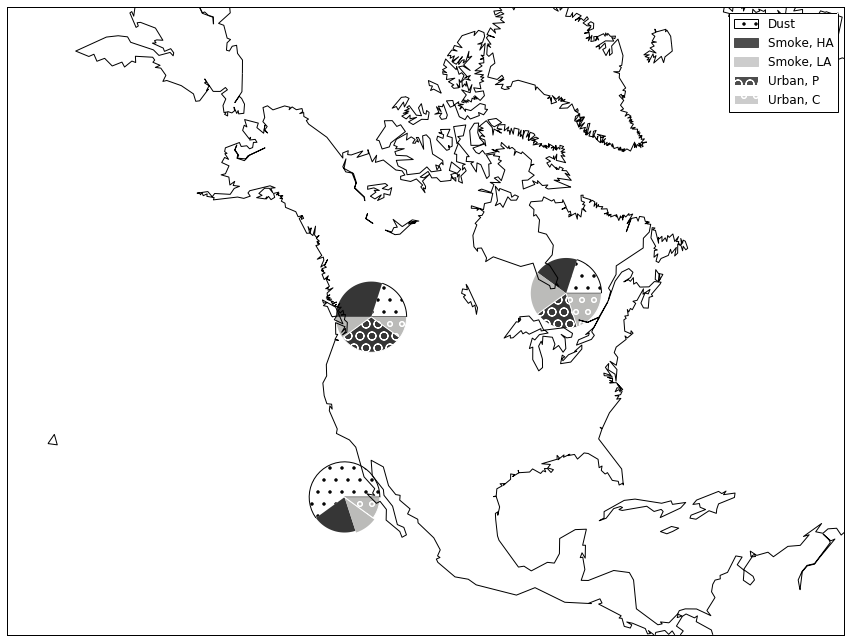

In [12]:
# setup Lambert Conformal basemap.
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.,ax=ax)

# draw coastlines.
m.drawcoastlines()


X,Y = m(-118, 27)
data = draw_pie(ax,[.60, .20, .10, .0, .10], X, Y,size=5000)

X,Y = m(-118, 50)
data = draw_pie(ax,[.20, .30, .10, .30, .10], X, Y,size=5000)

X,Y = m(-78, 50)
data = draw_pie(ax,[.20, .20, .20, .20, .20], X, Y,size=5000)



percent = '0.1%'
labels = ['Dust', 'Smoke, HA', 'Smoke, LA', 'Urban, P', 'Urban, C',]
sizes = [20, 20, 20, 20, 20]
colors = ['w', '0.3', '0.8', '0.3', '0.8']
axin = inset_axes(m.ax,width=percent,height=percent, loc=1)
patch =axin.pie(sizes, explode=explode, colors=colors, startangle=0)[0]

#hatching
patch[0].set_hatch('.')
patch[1].set_hatch('')
patch[1].set_edgecolor('0.3')
patch[2].set_hatch('')
patch[2].set_edgecolor('0.8')
patch[3].set_hatch('O')
patch[3].set_edgecolor('w')
patch[4].set_hatch('o')
patch[4].set_edgecolor('w')
axin.axis('equal')


ax.legend(patch, labels)


plt.show()
